<a href="https://colab.research.google.com/github/vijaylaxmid/DeepLearning_Assignment1/blob/master/deeplearning_lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *


In [0]:
folder = 'pomeranian'
file = 'pomeranian.csv'

In [0]:
path = Path('data/dogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
download_images(path/file, dest, max_pics=50, max_workers=0)

In [0]:
folder = 'german_shephard'
file = 'german_shephard.csv'

In [0]:
path = Path('data/dogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
download_images(path/file, dest, max_pics=50, max_workers=0)

In [0]:
folder = 'pug'
file = 'pug.csv'

In [0]:
path = Path('data/dogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
download_images(path/file, dest, max_pics=50, max_workers=0)

In [11]:
path.ls()

[PosixPath('data/dogs/german_shephard.csv'),
 PosixPath('data/dogs/pomeranian.csv'),
 PosixPath('data/dogs/german_shephard'),
 PosixPath('data/dogs/.ipynb_checkpoints'),
 PosixPath('data/dogs/pug.csv'),
 PosixPath('data/dogs/pug'),
 PosixPath('data/dogs/cleaned.csv'),
 PosixPath('data/dogs/models'),
 PosixPath('data/dogs/pomeranian')]

In [0]:
classes = ['german_shephard','pug','pomeranian']


In [13]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

german_shephard


pug


pomeranian


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes


['german_shephard', 'pomeranian', 'pug']

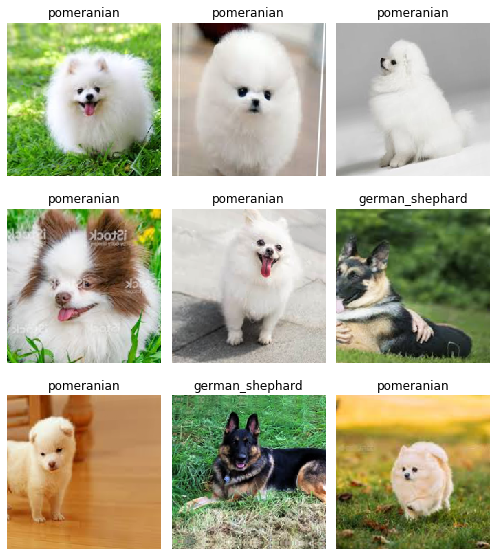

In [16]:
data.show_batch(rows=3, figsize=(7,8))


In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['german_shephard', 'pomeranian', 'pug'], 3, 224, 56)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [19]:

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.541831,0.297985,0.142857,00:03
1,0.890839,0.004653,0.000000,00:02
2,0.585009,0.004113,0.000000,00:03
3,0.439218,0.006826,0.000000,00:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [25]:

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


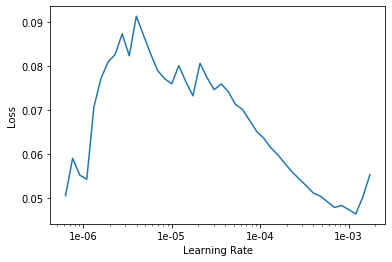

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.050894,0.062059,0.017857,00:03
1,0.048949,0.083501,0.017857,00:03


In [0]:
learn.save('stage-2')

Interpretation

In [0]:
learn.load('stage-2');

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

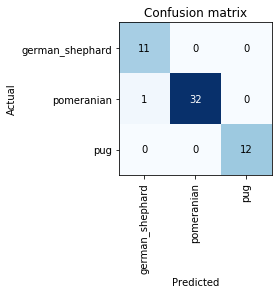

In [31]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [35]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [35]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

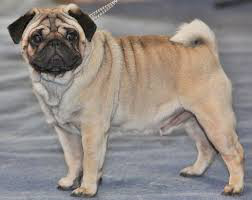

In [40]:
img = open_image(path/'pug'/'00000001.jpg')
img

In [0]:
learn = load_learner(path)

In [42]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category pug

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [44]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,7.395487,1694278016.000000,0.803571,00:03


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [46]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.031360,2.547604,0.732143,00:03
1,2.093522,1.752643,0.625000,00:03
2,2.062394,1.405207,0.517857,00:03
3,2.059739,1.256856,0.500000,00:03
4,2.057089,1.193874,0.464286,00:03


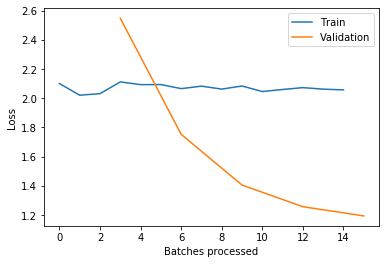

In [47]:
learn.recorder.plot_losses()


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [49]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.457043,7.917733,0.785714,00:03


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=10, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [60]:
learn.fit_one_cycle(10, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.904617,1.181983,0.611111,00:03
1,1.724399,1.151639,0.583333,00:02
2,1.494267,0.934474,0.428571,00:02
3,1.289735,0.755795,0.329365,00:02
4,1.164718,0.605273,0.250000,00:02
5,1.006121,0.494541,0.146825,00:02
6,0.908760,0.444342,0.134921,00:02
7,0.819868,0.449051,0.150794,00:02
8,0.745122,0.453982,0.162698,00:02
9,0.695504,0.485124,0.166667,00:02
